In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var
from pyclouds.plotting import plot_hydrometeor_evolution

from unified_microphysics.tests.test_common import um_constants

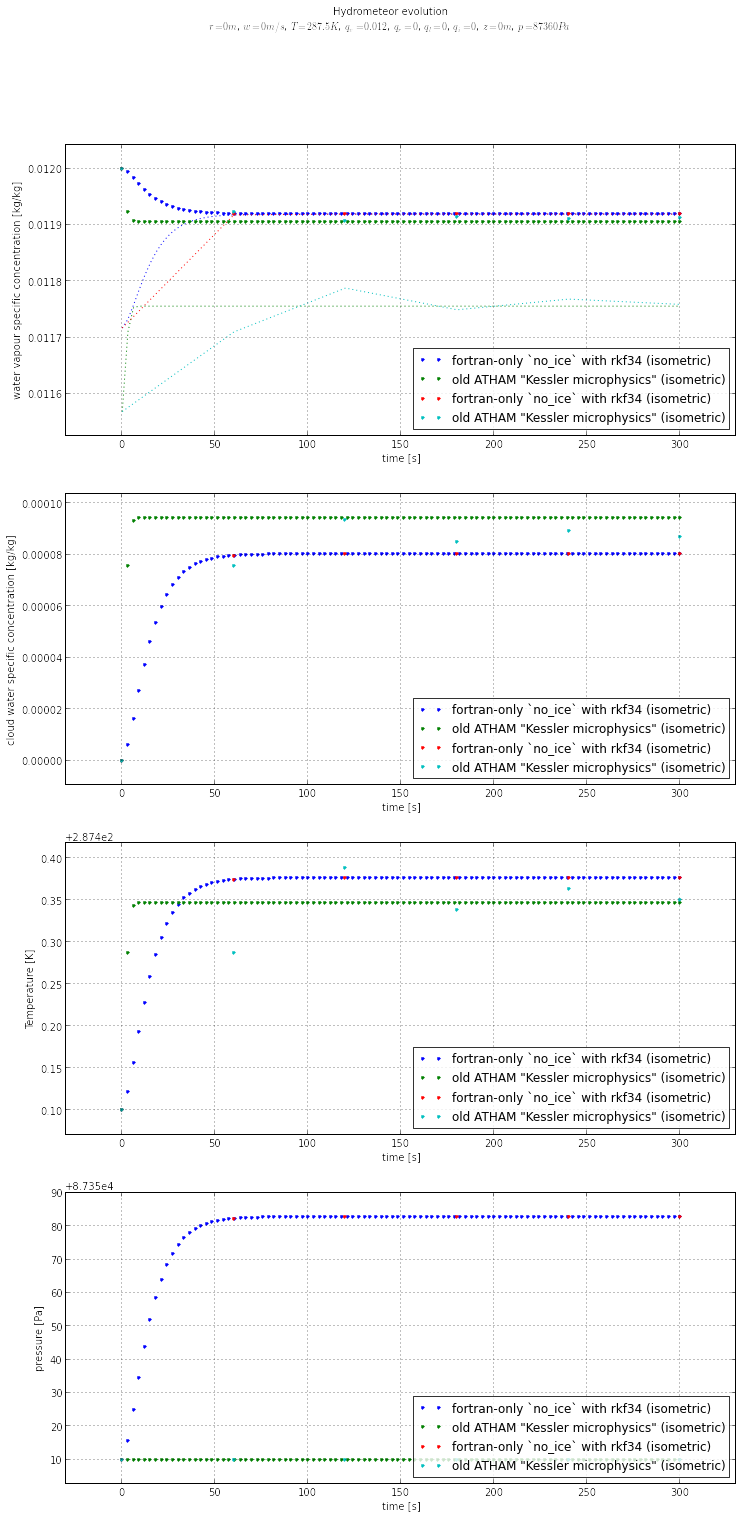

In [15]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] =  1.2E-2
initial_condition[Var.q_l] = 0.0E-4

initial_condition[Var.T] = 287.5
p0 = 87360.0  # [Pa]
initial_condition[Var.p] = p0

t_max = 300.
dt_l = 60.

t_ = np.linspace(0., t_max, 100)

solutions = []
solutions.append(cloud_microphysics.ExplicitFortranModel('isometric').integrate(initial_condition=initial_condition, t=t_))

solutions.append(cloud_microphysics.OldATHAMKesslerFortran().integrate(initial_condition=initial_condition, t=t_))

t_ = np.linspace(0., t_max, t_max/dt_l+1)

solutions.append(cloud_microphysics.ExplicitFortranModel('isometric').integrate(initial_condition=initial_condition, t=t_))
solutions.append(cloud_microphysics.OldATHAMKesslerFortran().integrate(initial_condition=initial_condition, t=t_))



#sol2.plot()
plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'q_l', 'T', 'p',], legend_loc='lower right', initial_condition=initial_condition)

In [ ]:
print p0